In [5]:
import pandas as pd
import re
import numpy as np
from collections import Counter


## Carga de datos

https://www.kaggle.com/competitions/spooky-author-identification/data


notebook: https://www.kaggle.com/code/nnjjpp/author-identification-statistical-nlp/notebook#7.3-Latent-Semantic-Analysis

In [6]:
data = pd.read_csv("spooky-author-identification/train.zip")

In [7]:
data["text"].map(len).describe()

count    19579.000000
mean       149.057408
std        106.800189
min         21.000000
25%         81.000000
50%        128.000000
75%        191.000000
max       4663.000000
Name: text, dtype: float64

In [8]:
X = data.text.values
y = data.author.values

## Preprocesamiento

### Tokenización
Cómo queremos distinguir el estilo de 3 autores, vamos a dejar los signos de puntuación, ya que su uso puede ser un elemento caracterísco de cada autor. Del mismo modo, no aplicaremos más procesamiento a las tokens, porque el usar unas formas u otras podría ser un rasgo del estilo de un autor. Cabría la posibilidad de hacerlo. 

In [9]:
def tokenize(X):
    return [re.findall(r'\w+|[^\w\s]', sentence) for sentence in X]
    # return re.findall(r'\w+|[^\w\s]', sentence)


def enconder_word2int(X, vocab, word_counter = None, vocab_size=None):

    if not vocab_size:
        vocab_size = len(vocab)

    limited_vocab = [k for k, _ in word_counter.most_common(vocab_size-1)]
    word_encoder = {w:i+1 for i,w in enumerate(limited_vocab)}
    
    return np.array([list([word_encoder.get(w,0) for w in s]) for s in X], dtype=object)

layer.Embedding toma numeros del 1 al vocab_size -> Hay que codificar los tokens

In [10]:
vocab = {token  for sentence in tokenize(X) for token in sentence}
print(f"Nuestro vocabulario tiene {len(vocab)} tokens")

Nuestro vocabulario tiene 27503 tokens


In [11]:
vocab_size=20000

word_counter = Counter()
for tokens in tokenize(X):
    word_counter.update(tokens)

In [13]:
tokens_mas_frecuentes = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)[:20]

print("20 tokens más frecuentes en el dataset:")
print("-" * 40)
print(f"{'Palabra':<20} | {'Frecuencia':<10}")
print("-" * 40)
for token, frecuencia in tokens_mas_frecuentes:
    print(f"{token:<20} | {frecuencia:<10}")

20 tokens más frecuentes en el dataset:
----------------------------------------
Palabra              | Frecuencia
----------------------------------------
,                    | 38220     
the                  | 33344     
of                   | 20873     
.                    | 20075     
and                  | 17427     
to                   | 12652     
I                    | 10806     
a                    | 10383     
in                   | 8843      
was                  | 6615      
that                 | 6259      
;                    | 5159      
my                   | 5045      
"                    | 4969      
had                  | 4382      
with                 | 4220      
it                   | 3961      
his                  | 3824      
as                   | 3546      
he                   | 3533      


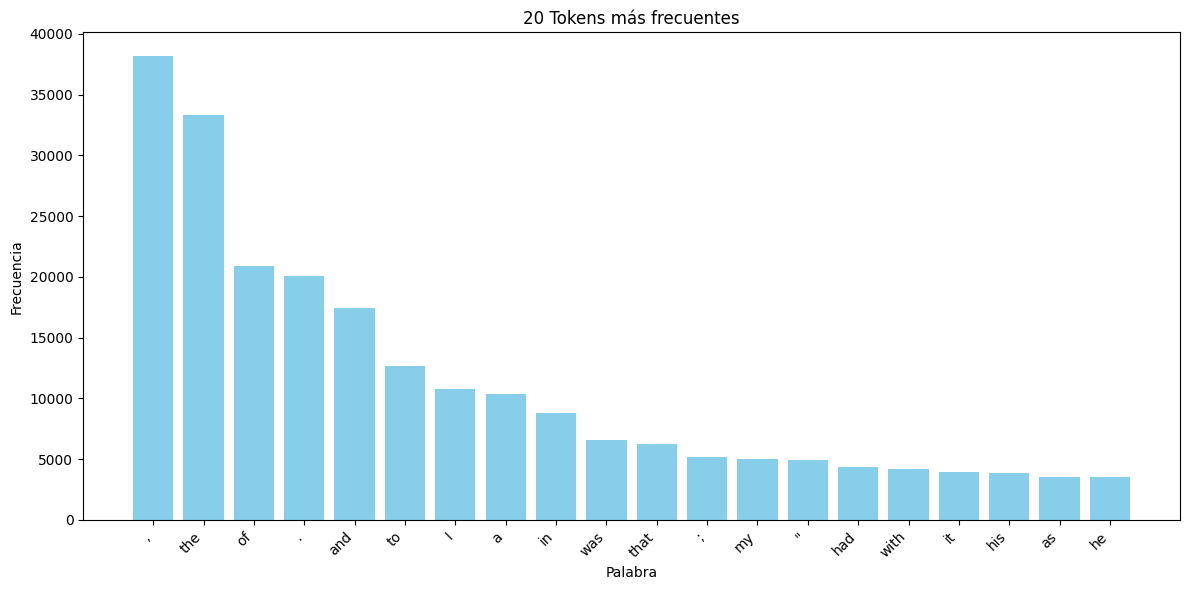

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
tokens = [item[0] for item in tokens_mas_frecuentes]
frecuencias = [item[1] for item in tokens_mas_frecuentes]

plt.bar(tokens, frecuencias, color='skyblue')
plt.title('20 Tokens más frecuentes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Número de muestras por autor')

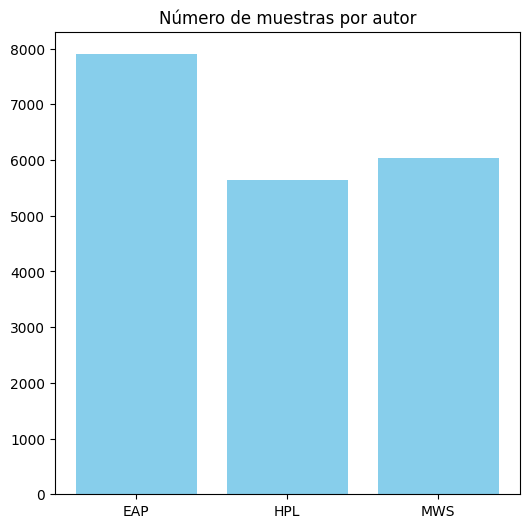

In [22]:
classes_count = np.unique(y,return_counts=True)

plt.figure(figsize=(6,6))
plt.bar(classes_count[0], classes_count[1], color='skyblue')
plt.title('Número de muestras por autor')